In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-19 01:45:01--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.24.48, 2404:6800:4006:804::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.24.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

inception_v3_weight 100%[===================>]  83.84M  22.0MB/s    in 4.8s    

2023-05-19 01:45:06 (17.3 MB/s) - ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [2]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [3]:
weights1="inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [4]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(weights1)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [5]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [6]:
from tensorflow.keras.optimizers import Adam

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory("../input/dogs-cats-images/dataset/training_set/",
                                                    batch_size = 40,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory( "../input/dogs-cats-images/dataset/test_set/",
                                                          batch_size  = 40,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            verbose = 2)

Epoch 1/100
100/100 - 52s - loss: 0.2663 - accuracy: 0.8765 - val_loss: 0.1123 - val_accuracy: 0.9555
Epoch 2/100
100/100 - 42s - loss: 0.1843 - accuracy: 0.9230 - val_loss: 0.0905 - val_accuracy: 0.9620
Epoch 3/100
100/100 - 42s - loss: 0.1610 - accuracy: 0.9268 - val_loss: 0.1391 - val_accuracy: 0.9445
Epoch 4/100
100/100 - 38s - loss: 0.1569 - accuracy: 0.9370 - val_loss: 0.0815 - val_accuracy: 0.9640
Epoch 5/100
100/100 - 38s - loss: 0.1494 - accuracy: 0.9377 - val_loss: 0.0767 - val_accuracy: 0.9675
Epoch 6/100
100/100 - 38s - loss: 0.1375 - accuracy: 0.9440 - val_loss: 0.0862 - val_accuracy: 0.9645
Epoch 7/100
100/100 - 38s - loss: 0.1544 - accuracy: 0.9340 - val_loss: 0.0761 - val_accuracy: 0.9665
Epoch 8/100
100/100 - 38s - loss: 0.1342 - accuracy: 0.9467 - val_loss: 0.0771 - val_accuracy: 0.9715
Epoch 9/100
100/100 - 37s - loss: 0.1386 - accuracy: 0.9440 - val_loss: 0.1019 - val_accuracy: 0.9635
Epoch 10/100
100/100 - 37s - loss: 0.1293 - accuracy: 0.9455 - val_loss: 0.0738 - 

<Figure size 432x288 with 0 Axes>

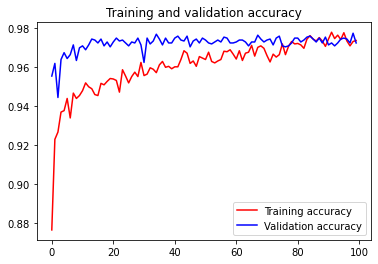

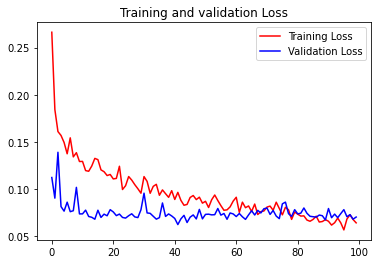

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()